Project Context
- 
Cybersecurity is seriously threatened by malicious websites or URLs. Malicious URLs host unsolicited content (spam, phishing, drive-by downloads, etc.) and deceive users into falling for scams (including financial loss, identity theft, and malware installation), resulting in billions of dollars in losses each year. In order to build a machine learning-based model to recognize malicious urls and prevent them from infecting computer systems or spreading through the internet, I have gathered this dataset, which contains many examples of malicious urls using the following sources.
1) https://www.unb.ca/cic/datasets/url-2016.html
</br>
2) https://github.com/faizann24/Using-machine-learning-to-detect-malicious-URLs/tree/master/data
</br>
3) https://www.phishtank.com/developer_info.php
</
4) https://research.aalto.fi/en/datasets/phishstorm-phishing-legitimate-url-dataset

In [967]:
import pandas as pd
import numpy as np

#reading the various datasets
benign = pd.read_csv("Benign_list_big_final.csv")
defacement = pd.read_csv("DefacementSitesURLFiltered.csv")
malware = pd.read_csv("Malware_dataset.csv", sep = "\t")
phishing_2 = pd.read_csv("phishing_dataset.csv")
spam = pd.read_csv("spam_dataset.csv")
verified_online = pd.read_csv("verified_online.csv")
data2 = pd.read_csv("data2.csv")

malware1 = pd.read_csv("malware.csv")
malware1 = malware1.query("type == 'malware'")


data1 = pd.read_csv("data.csv")
data1.columns = ['url', 'type']
data1.type.replace('good', 'benign', inplace = True)

df = pd.read_csv("urlset.csv", sep = ',', encoding = 'latin1', error_bad_lines=False)

## Performing Data Clearning

In [971]:
phishing = df.query('label==1.0')
phishing = phishing.iloc[ : ,0:1]
phishing.columns = ["url"]
print(phishing.columns, phishing.shape)

# selecting the legitimate urls
legitimate = df.query('label==0.0')
legitimate = legitimate.iloc[ : ,0:1]
legitimate.columns = ["url"]
legitimate.columns, legitimate.shape

Index(['url'], dtype='object') (47904, 1)


(Index(['url'], dtype='object'), (48009, 1))

In [972]:
# legitimate.columns = ["url"]
def type_(x):
    u = []
    for i in range(x):
        c = 'phishing'
        u.append(c)
    col = ['type']
    return u
phishing['type'] = [x for x in type_(phishing.shape[0])]

In [973]:
# legitimate.columns = ["url"]
def type_(x):
    u = []
    for i in range(x):
        c = 'benign'
        u.append(c)
    col = ['type']
    return u
legitimate['type'] = [x for x in type_(legitimate.shape[0])]

In [974]:
defacement.columns = ["url"]
def type_(x):
    u = []
    for i in range(x):
        c = 'defacement'
        u.append(c)
    col = ['type']
    return pd.DataFrame(data = u, columns = col)

defacement= pd.concat([defacement, type_(defacement.shape[0])], axis =1)

In [975]:
malware.columns = ['url']
def type_(x):
    u = []
    for i in range(x):
        c = 'malware'
        u.append(c)
    col = ['type']
    return u
malware['type'] = [x for x in type_(malware.shape[0])]

In [976]:
phishing_2.columns = ['url']
def type_(x):
    u = []
    for i in range(x):
        c = 'phishing'
        u.append(c)
    col = ['type']
    return pd.DataFrame(data = u, columns = col)

phishing_2 = pd.concat([phishing_2, type_(phishing_2.shape[0])], axis = 1)

In [977]:
benign.columns = ['url']
def type_(x):
    u = []
    for i in range(x):
        c = 'benign'
        u.append(c)
    col = ['type']
    return pd.DataFrame(data = u, columns = col)

benign = pd.concat([benign, type_(benign.shape[0])], axis = 1)

In [978]:
verified_online = verified_online.iloc[:,1:2]
def type_(x):
    u = []
    for i in range(x):
        c = 'phishing'
        u.append(c)
    col = ['type']
    return pd.DataFrame(data = u, columns = col)

verified_online = pd.concat([verified_online, type_(verified_online.shape[0])], axis = 1)

# viewing and accessing the transformed datasets

In [979]:
verified_online

,url,type
0,https://irsdrawbk.info/m5fu,phishing
1,https://irsdrawbk.info/Ub91r,phishing
2,https://besichangei.us/,phishing
3,https://webprestamoextracash-solicitud.com/,phishing
4,http://tophyips.site/,phishing
...,...,...
64854,http://www.formbuddy.com/cgi-bin/formdisp.pl?u...,phishing
64855,https://sites.google.com/site/libretyreserve/,phishing
64856,http://www.habbocreditosparati.blogspot.com/,phishing
64857,http://creditiperhabbogratissicuro100.blogspot...,phishing


In [980]:
legitimate

,url,type
47996,www.sec.gov/edgar.shtml,benign
47997,www.taxsites.com/associations2.html,benign
47998,www.crescan.com/pakistanicma/,benign
47999,www.ficpa.org/content/home.aspx,benign
48000,pacioli.loyola.edu/aecm/,benign
...,...,...
96000,xbox360.ign.com/objects/850/850402.html,benign
96001,games.teamxbox.com/xbox-360/1860/Dead-Space/,benign
96002,www.gamespot.com/xbox360/action/deadspace/,benign
96003,en.wikipedia.org/wiki/Dead_Space_(video_game),benign


In [981]:
phishing

,url,type
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,phishing
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,phishing
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,phishing
3,mail.printakid.com/www.online.americanexpress....,phishing
4,thewhiskeydregs.com/wp-content/themes/widescre...,phishing
...,...,...
47991,imetrica.net/css/,phishing
47992,www.idxband.com/telin/images/e-online.php,phishing
47993,www.coffeewithsophieinc.com/media/system/js/ca...,phishing
47994,conseguircreditos.webs.tl/,phishing


In [982]:
defacement

,url,type
0,http://www.sinduscongoias.com.br/index.php/ins...,defacement
1,http://www.sinduscongoias.com.br/index.php/ins...,defacement
2,http://www.sinduscongoias.com.br/index.php/ins...,defacement
3,http://www.sinduscongoias.com.br/index.php/ins...,defacement
4,http://www.sinduscongoias.com.br/index.php/ins...,defacement
...,...,...
96451,http://www.laurenzano.com.ar/index.php?option=...,defacement
96452,http://www.laurenzano.com.ar/templates/laurenz...,defacement
96453,http://www.laurenzano.com.ar/templates/laurenz...,defacement
96454,http://www.laurenzano.com.ar/x.txt,defacement


In [983]:
malware

,url,type
0,http://gzzax.livechatvalue.com/chat/chatClient...,malware
1,http://gzzax.livechatvalue.com/chat/chatClient...,malware
2,http://gzzax.livechatvalue.com/chat/chatClient...,malware
3,http://mtsx.com.cn/UploadFiles/2011-08/admin/%...,malware
4,http://mtsx.com.cn/UploadFiles/2011-08/admin/%...,malware
...,...,...
11560,http://www.plastischechirurgie.net/gesicht/fac...,malware
11561,http://www.plastischechirurgie.net/haartranspl...,malware
11562,http://www.plastischechirurgie.net/korper/gyna...,malware
11563,http://dl.get1993desk.com/n/50517366/RealPlaye...,malware


In [995]:
phishing_2

,url,type
0,http://bid.openx.net/json?amp;amp;amp;amp;cid;...,phishing
1,http://webmail2.centurytel.net/hwebmail/servic...,phishing
2,http://www.google.com.ng/imgres?imgurl=http://...,phishing
3,http://webmail2.centurytel.net/hwebmail/servic...,phishing
4,http://www.liceonuzzi.it/cmd=_Inf/connectionSt...,phishing
...,...,...
9959,http://highedgesolar.com/nw/includes/,phishing
9960,http://jimfangimporters.yolasite.com/,phishing
9961,http://liuheng.chengxuren.com/Images/,phishing
9962,http://mcnaotempreco.net/site/portal/,phishing


In [985]:
benign

,url,type
0,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign
1,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign
2,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign
3,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign
4,http://1337x.to/torrent/1160078/Avengers-age-o...,benign
...,...,...
35372,https://lastpass.com/signup2.php?ac=1&from_uri...,benign
35373,https://lastpass.com/signup2.php?ac=1&from_uri...,benign
35374,https://lastpass.com/signup2.php?ac=1&from_uri...,benign
35375,https://lastpass.com/signup2.php?ac=1&from_uri...,benign


In [986]:
data2.columns = ['url', 'type']
data2

,url,type
0,news.grouptumbler.com/news/feed.php,bad
1,info.leveldelta.com/php/text.php,bad
2,citroen-club.ch/n.exe,bad
3,zehir4.asp,bad
4,ZHC_Shell_1.0.aspx,bad
...,...,...
32870,23.227.196.215/,bad
32871,apple-checker.org/,bad
32872,apple-iclods.org/,bad
32873,apple-uptoday.org/,bad


# Merging the Datasets

In [987]:
data = pd.concat((legitimate,phishing, defacement, malware, phishing_2, data2, data1[:150000], verified_online, malware1), axis =0)

<AxesSubplot:>

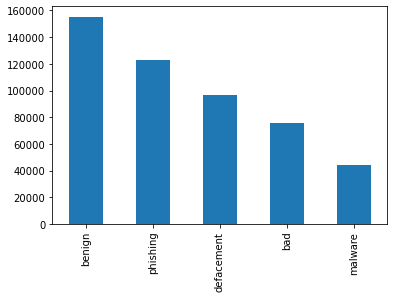

In [989]:
import matplotlib.pyplot as plt
data['type'].value_counts().plot(kind ='bar')

In [990]:
data['type'].value_counts()

benign        155242
phishing      122727
defacement     96456
bad            75642
malware        44085
Name: type, dtype: int64

In [991]:
data.shape

(494152, 2)

In [992]:
# Dropping off duplicated values
data.drop_duplicates(inplace = True)

In [993]:
data['type'].value_counts()

benign        155236
phishing      122711
defacement     95307
bad            66447
malware        23645
Name: type, dtype: int64

<AxesSubplot:>

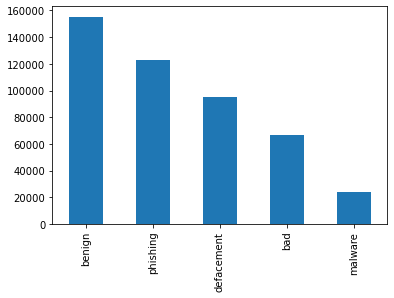

In [994]:
data['type'].value_counts().plot(kind ='bar')

# saving our final dataset

In [996]:
# data.to_csv("datasets.csv")